# INTRODUCTION

This notebook describes a step by step development of a model to predict wether a person is likely to default a loan or not based on different independent variables. My assignment was to develop a simple Decision tree classifier and evaluate its accuracy but in this notebook i have went an extra mile of comparing three machine learning algorithms and deploying the model with the best accuracy.
Data source : kaggle.com

# Importing necessary libraries

In [57]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# Loading of data

In [58]:
df = pd.read_csv('/content/Default_Fin.csv')

In [59]:
df.head(5)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


# Exploratory Data Analysis

In [60]:
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [61]:
df.shape

(10000, 5)

In [62]:
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


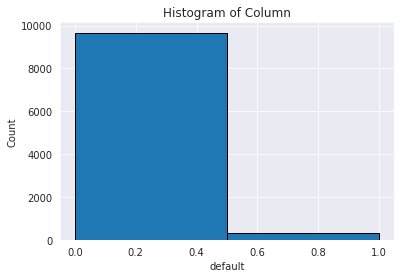

In [63]:
plt.hist(df['Defaulted?'], bins=2, edgecolor='black', align='mid')
plt.xlabel('default')
plt.ylabel('Count')
plt.title('Histogram of Column')
plt.show()

In [64]:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


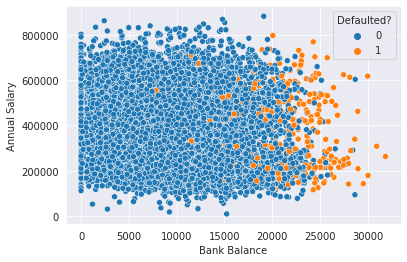

In [65]:
sns.scatterplot(df['Bank Balance'], df['Annual Salary'], hue=df['Defaulted?'])
plt.show()

In [66]:
# Number of person who are defaulter and don;t have job
(df[(df['Defaulted?']==1) & (df['Employed']==0)].shape[0])/(df[df['Defaulted?'] == 1].shape[0]) * 100

38.13813813813814

In [67]:
# Number of person who are defaulter and  have job
df[(df['Defaulted?']==1) & (df['Employed']==1)].shape[0]/(df[df['Defaulted?'] == 1].shape[0]) * 100

61.86186186186187

# Feature engineering

In [68]:
df.drop(columns=['Index'], inplace=True)

In [69]:
X = df.iloc[:, 0:-1]

In [70]:
X.head()

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00


In [71]:
y = df.iloc[:, -1]

In [72]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Defaulted?, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train_scaled = st.fit_transform(X_train)
X_test_scaled = st.transform(X_test)

In [75]:
X_train_scaled

array([[ 0.64512003,  0.38108615,  0.03730782],
       [ 0.64512003, -1.59177456, -0.37009848],
       [ 0.64512003,  0.43919519,  0.540178  ],
       ...,
       [ 0.64512003, -0.23061619, -0.49558007],
       [-1.55009913, -1.38184353, -0.93727639],
       [ 0.64512003, -0.40531461,  1.20145382]])

# Model Training

split data into two train has 800 columns while test has 200 columns chosen randomly using a random state of 42

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# *Decision tree classifier*

In [77]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1)

In [78]:
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [79]:
y_pred_dtc = dtc.predict(X_test_scaled)

In [80]:
accuracy_score(y_pred_dtc, y_test)

0.9555

<AxesSubplot:>

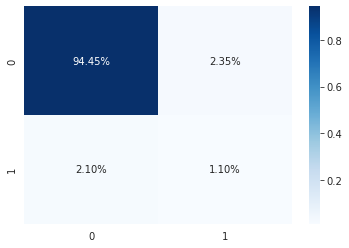

In [81]:
cf_matrix = confusion_matrix( y_pred_dtc, y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# *Random Forest*

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [83]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [84]:
y_pred_rfc = rfc.predict(X_test_scaled)

In [85]:
accuracy_score(y_pred_rfc, y_test)

0.965

<AxesSubplot:>

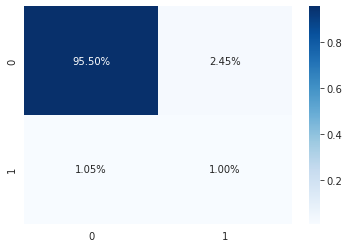

In [86]:
cf_matrix = confusion_matrix( y_pred_rfc, y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# *Gradient Boosting*

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

gbc.fit(X_train_scaled,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [89]:
y_pred_gbc = gbc.predict(X_test_scaled)

In [90]:
accuracy_score(y_pred_gbc, y_test)

0.966

<AxesSubplot:>

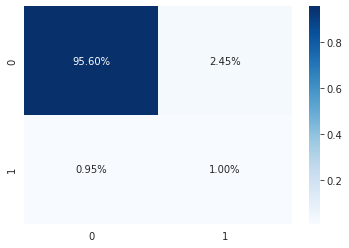

In [91]:
cf_matrix = confusion_matrix( y_pred_gbc, y_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# MODEL DEPLOYMENT

In [92]:
import pickle
pickle.dump(y_pred_gbc,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))
#model.save('path/to/location')

# Conclusion

After training the model i was able to conclude that Gradient boosting was the best algorithm in terms of accuracy among the three followed by decision forests, decision trees came last.  